<a href="https://colab.research.google.com/github/abdullashahzan/colab_notebooks/blob/main/generalAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pizza price predictor with tensorflow

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# data = size
X = np.array([
    [12],
    [14],
    [10],
    [9],
    [15],
    [19]
])

y = np.array([24, 28, 20, 18, 30, 38])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=1000)

In [ ]:
# Predict on new data
new_data = np.array([[6], [17], [27], [100]])
predictions = model.predict(new_data)
print(predictions)

1/1 [==============================] - 0s 40ms/step
[[ 12.683228]
 [ 33.739723]
 [ 52.881996]
 [192.62059 ]]


# Ice cream suggester with tensorflow

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# data = is adult?, is diabetic?, is sick?
data_X = np.array([
    [1,1,1],
    [1,1,0],
    [1,0,0],
    [0,0,0],
    [0,0,1],
    [0,1,1],
    [0,1,0],
    [1,0,1]
])
data_y = np.array([0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # what if we use mean_squared_error

In [ ]:
model.fit(data_X, data_y, epochs=1)

1/1 [==============================] - 1s 623ms/step - loss: 0.6774 - accuracy: 0.5000


In [ ]:
new_data = np.array([
    [0,1,0],
    [1,0,0]
])
prediction = model.predict(new_data)
threshold = 0.5

readable_list = []

for i in prediction:
  if i[0] >= 0.5:
    readable_list.append("Will eat ice cream")
  else:
    readable_list.append("Will not eat ice cream")

print(readable_list)

1/1 [==============================] - 0s 17ms/step
['Will eat ice cream', 'Will not eat ice cream']


# Working with keras dataset

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
fashion_objects = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

(60000, 28, 28)
(60000,)
Bag


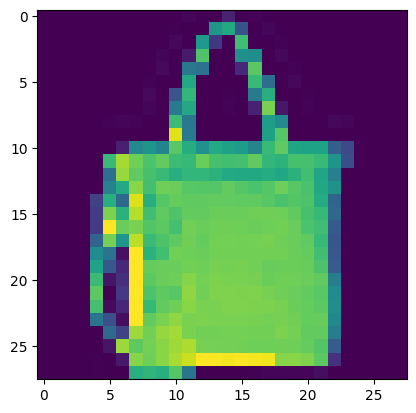

In [ ]:
#looking at our data
print(X_train.shape)
print(y_train.shape)

import random
random_number = random.randint(0, 60000)
plt.imshow(X_train[random_number])
print(fashion_objects[y_train[random_number]])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=1, batch_size=25)

2400/2400 [==============================] - 6s 2ms/step - loss: 0.4944 - accuracy: 0.8276


In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


Sneaker


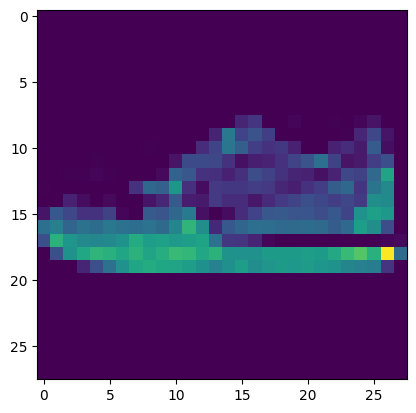

In [ ]:
random_number = random.randint(0, 10000)
plt.imshow(X_test[random_number])
print(fashion_objects[np.argmax(predictions[random_number])])